# Importing Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import various functions from scipy
from scipy import stats

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


#Importing functions to perform Sampling for class imbalance
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTEENN

#Importing the machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression



# Reading the dataset

In [2]:
data = pd.read_csv('IBM Dataset.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [154]:
data.shape

(1058, 35)

In [3]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# About the dataset :

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum().sum() #To check null value sum over rows and columns

0

In [7]:
data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,37.055766,0.169187,809.542533,8.978261,2.879017,1.000000,731.753308,2.712665,65.643667,2.737240,2.090737,2.749527,6625.945180,14267.281664,2.706994,15.155955,3.150284,2.726843,80.000000,0.762760,11.435728,2.769376,2.763705,7.065217,4.260870,2.203214,4.142722
std,9.410421,0.375094,408.478049,8.040608,1.031442,0.000000,431.418209,1.092959,20.324861,0.704730,1.136514,1.104144,4837.695042,7048.077305,2.523526,3.641097,0.357518,1.090970,0.000000,0.837537,8.016429,1.302689,0.707392,6.265227,3.617470,3.266948,3.599044
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.250000,2.000000,2.000000,1.000000,364.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2900.250000,8277.250000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,817.500000,7.000000,3.000000,1.000000,723.500000,3.000000,65.000000,3.000000,2.000000,3.000000,4903.500000,14201.000000,2.000000,14.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1168.500000,13.000000,4.000000,1.000000,1101.750000,4.000000,83.000000,3.000000,3.000000,4.000000,8736.500000,20364.000000,4.000000,18.000000,3.000000,4.000000,80.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.000000,1487.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Inferences from numeric variables:

The average age of the employees working in the company is 36.
We can see that almost 75% of the employees have undergone trainings last year which has led to moderate Performance rating and job satisfaction.
We can see that columns EmployeeCount and StandardHours have 0 deviation which makes it an insignificant variable to the model.Hence, We will drop EmployeeCount and StandardHours during data preparation.

In [8]:
data.describe(include=object)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1058,1058,1058,1058,1058,1058,1058,1058
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,746,701,436,620,232,464,1058,751


#### Inferences from categorical variables:

We can see here that in Over18 column there is only 1 unique value. Hence, We will drop Over18 column during data preparation.
We can see here that OverTime and Gender have only 2 unique values. Hence, We can implement binary encoding on OverTime and Gender.For the other columns one-hot encoding or ordinal encoding can be implemented

In [158]:
emp_num=data['EmployeeNumber']
emp_num.nunique()

1058

In [10]:
df=data.copy()
df=df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis=1)

In [11]:
df.shape

(1058, 31)

# Splitting into numerical and categorical

In [12]:
df_num = df.select_dtypes(include = np.number)
df_cat = df.select_dtypes(include = 'object')

In [13]:
df_num.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


In [14]:
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


# Checking for Outliers

In [15]:
data.shape

(1058, 35)

## Numerical Variables

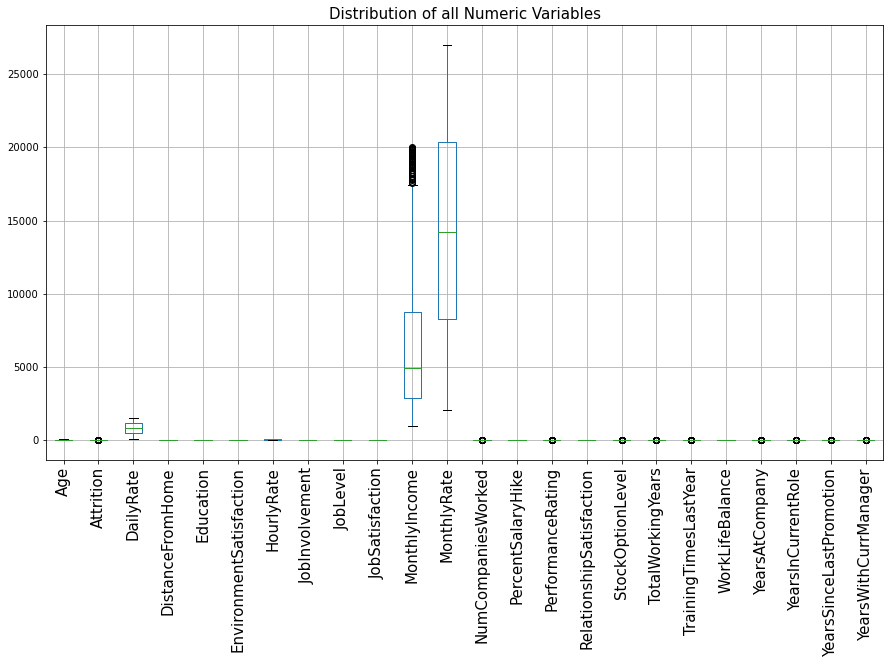

In [16]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_num.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

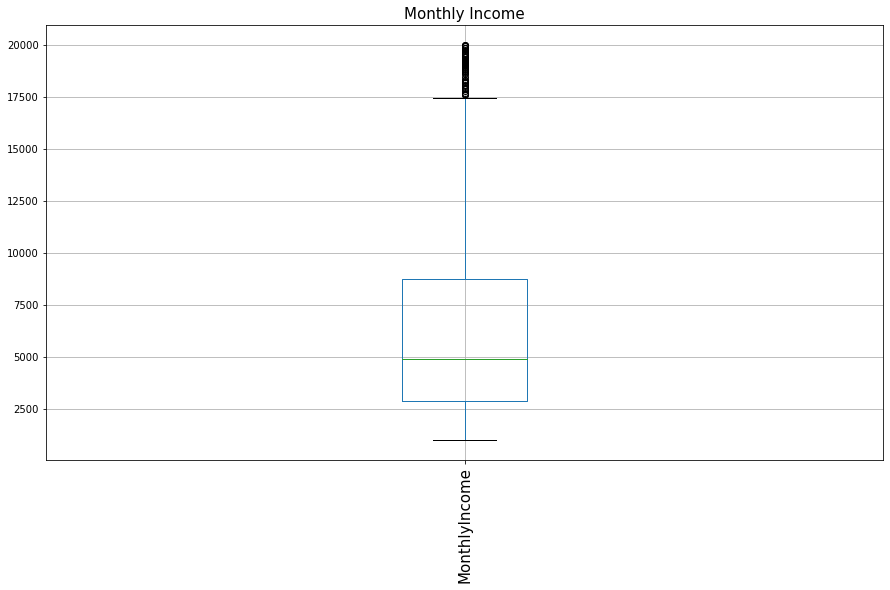

In [17]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_num[['MonthlyIncome']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Monthly Income', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Inferences from detecting presence of outliers:

From the boxplot we can infer that the columns MonthlyIncome,TotalWorkingYears,TrainingTimesLastYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager have maximum outliers

# Outliers Treatment using IQR method 

In [18]:
# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = df_num.drop(['Attrition'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_num.drop(['Attrition'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

In [19]:
df_post_outliers=df_num[~((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_post_outliers.shape

(573, 24)

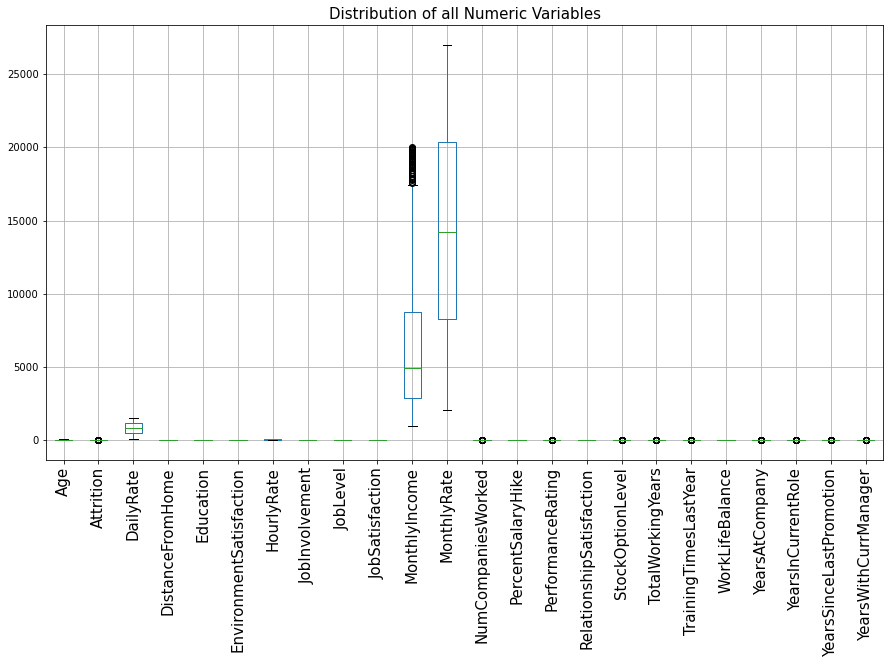

In [20]:
#We are selecting the columns that seems to have outliers except MonthlyIncome
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_num.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()


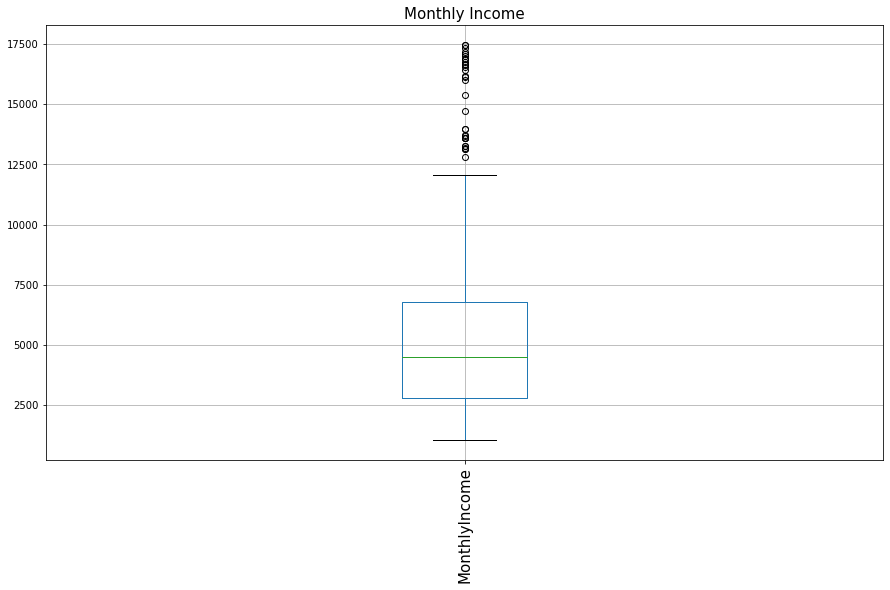

In [21]:
#We are selecting the columns that seems to have outliers except MonthlyIncome
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df_post_outliers[['MonthlyIncome']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Monthly Income', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot

plt.show()


Inference from Outlier treatment:

After outliers treatment using the IQR method we can see that there is partial removal of outliers in MonthlyIncome,TotalWorkingYears,YearsAtCompany and YearsSinceLastPromotion. We can see that the outliers have been removed completely in NumCompaniesWorked,PerformanceRating,StockOptionLevel,TrainingTimesLastYear,YearsInCurrentRole,
YearsWithCurrManager


# Multi - Collinearity

<AxesSubplot:>

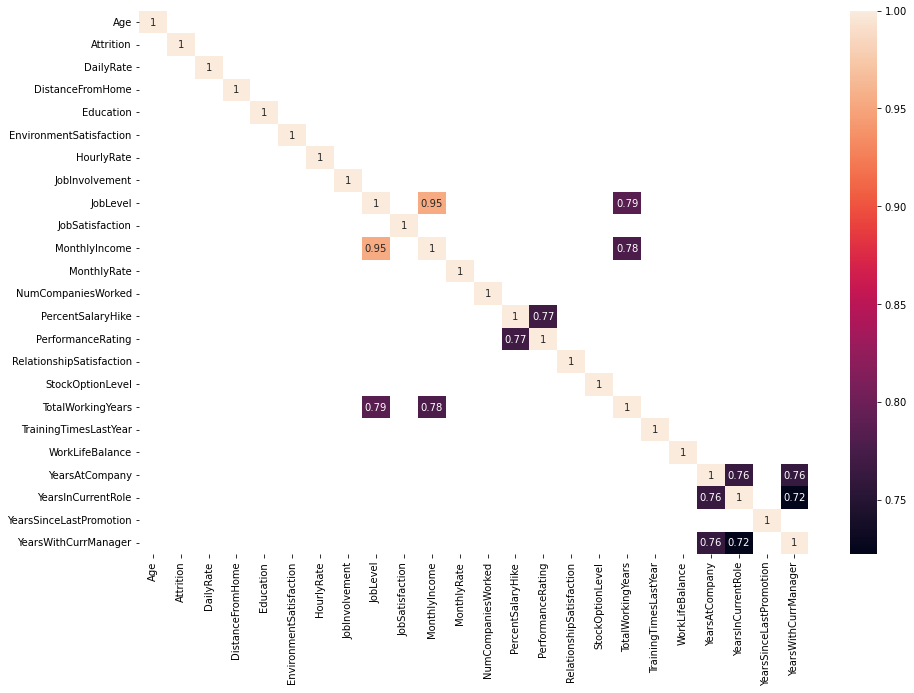

In [22]:
plt.figure(figsize = (15,10))
sns.heatmap(data=df_num.corr()[df_num.corr()>0.7],annot=True)

Based on the heatmap we can see that the following independent variables are highly correlated:

Monthly income and job level  - 0.95

Job level and total working years – 0.79

Monthly income and total working years – 0.78

Percent salary hike and performance rating – 0.77

Years in current role and years at company – 0.76

Years with current manager and year at company – 0.76

Years with current manager and Years in current role -0.72


### Treatment for Multicollinearity

In [23]:
X=df_num.drop('Attrition',axis=1)
Y=df_num['Attrition']

In [24]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.7,random_state=10)

In [25]:
#Fitting the dataset with Logit function to check the significance of each variable
model=sm.Logit(Y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.381846
         Iterations 7


# Finding P - Values for each attribute

In [26]:
model.pvalues

Age                        0.724555
DailyRate                  0.888571
DistanceFromHome           0.018830
Education                  0.433481
EnvironmentSatisfaction    0.004285
HourlyRate                 0.900922
JobInvolvement             0.000193
JobLevel                   0.923632
JobSatisfaction            0.074293
MonthlyIncome              0.229519
MonthlyRate                0.043847
NumCompaniesWorked         0.000439
PercentSalaryHike          0.374188
PerformanceRating          0.014509
RelationshipSatisfaction   0.360713
StockOptionLevel           0.000217
TotalWorkingYears          0.021849
TrainingTimesLastYear      0.333642
WorkLifeBalance            0.640775
YearsAtCompany             0.004462
YearsInCurrentRole         0.006123
YearsSinceLastPromotion    0.025194
YearsWithCurrManager       0.047274
dtype: float64

## Calculating the VIF score for the numerical variable

In [27]:
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df_num.columns
    vif["VIF"] = [variance_inflation_factor(df_num.values, i) for i in range(df_num.shape[1])]
    return(vif)

calc_vif(df_num)

,variables,VIF
0,Age,32.415669
1,Attrition,1.363963
2,DailyRate,4.981330
3,DistanceFromHome,2.310675
4,Education,9.034160
5,EnvironmentSatisfaction,7.116480
6,HourlyRate,11.038262
7,JobInvolvement,15.771884
8,JobLevel,52.504835
9,JobSatisfaction,6.994994


Inference from multicolinearity:

We pass the training datasets through logit function to identify the statistical significance of the dataset.

As a corrective measure for the presence of multi-collinearity we can drop the Job-Level as it has a high correlation with 2 major variables in the dataset. The VIF score for JobLevel exceeds 10 amd furthermore from the p-value scores we can see that the variable JobLevel it is insignificant as it has a value greater than the significance level (0.05)

We can see here that PerformanceRating and PercentageSalaryHike are also highly correlated. From p-value scores we can see that both variables are insignificant to the model. However, From the VIF scores we can see that the performance rating has a higher score when compared to the salary hike. Hence, We will drop performance rating form the model.

We can see here that Years in current role, Years with current manager and Years at company are also highly correlated. But from p-value scores all the variables seem to be significant to the model. Hence, We will not drop either of the variables.


### Pre - processing of numerical variables

In [28]:
def num_pre_processing(df):
    df_num_scaled = df.drop('Attrition', axis=1)
    df_target=df['Attrition']
    SS = StandardScaler()
    df_num_scaled=pd.DataFrame(SS.fit_transform(df_num_scaled),index=df_num_scaled.index,columns=df_num_scaled.columns)
    df_num_scaled= pd.concat([df_num_scaled,df_target],axis=1)
    return df_num_scaled

In [29]:
num_scaled=num_pre_processing(df_num)

In [30]:
num_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.419333,0.716307,-0.992715,-0.852624,-0.652359,1.395815,0.373028,-0.079876,1.133062,-0.130898,0.739802,2.098456,-1.141942,-0.420551,-1.583600,-0.911148,-0.428789,-2.126897,-2.494430,-0.170101,-0.072148,-0.674714,0.238309,1
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.079876,-0.679152,-0.309373,1.510306,-0.676752,2.155327,2.377833,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,-0.960176,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.420551,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,-0.960176,0.226955,-0.768693,1.262177,-0.676752,-1.141942,-0.420551,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,0
4,-1.069083,-0.535270,-0.868288,-1.822599,-1.567739,-1.262286,0.373028,-0.960176,-0.679152,-0.653088,0.335671,2.494915,-0.867169,-0.420551,1.167547,0.283393,-0.678394,0.177120,0.334195,-0.808847,-0.625282,-0.062232,-0.595640,0


# Comparision of classification reports BEFORE and AFTER dropping the highly correlated variables

In [31]:
def train_test(df):
    X=df.drop('Attrition',axis=1)
    Y=df['Attrition']
    X_train, X_test, Y_train, Y_test=train_test_split(X,Y,train_size=0.7,random_state=10)
    return X_train, X_test, Y_train, Y_test

In [32]:
X_train1, X_test1, Y_train1, Y_test1=train_test(num_scaled)

In [33]:
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
y_pred1 = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier before dropping the highly correlated independent variables: {:.2f}'.format(logreg.score(X_test1, Y_test1)))

Accuracy of logistic regression classifier before dropping the highly correlated independent variables: 0.87


In [34]:
print(classification_report(Y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       268
           1       0.67      0.32      0.43        50

    accuracy                           0.87       318
   macro avg       0.78      0.65      0.68       318
weighted avg       0.85      0.87      0.85       318



In [35]:
df_post_mul=num_scaled.drop(['JobLevel','PerformanceRating'],axis=1)

In [36]:
df_post_mul.shape

(1058, 22)

In [37]:
num_scaled.shape

(1058, 24)

In [38]:
X_train2, X_test2, Y_train2, Y_test2=train_test(df_post_mul)

In [39]:
logreg2 = LogisticRegression()
logreg2.fit(X_train2, Y_train2)
y_pred2 = logreg2.predict(X_test2)
print('Accuracy of logistic regression classifier before dropping the highly correlated independent variables: {:.2f}'.format(logreg2.score(X_test2, Y_test2)))

Accuracy of logistic regression classifier before dropping the highly correlated independent variables: 0.87


In [40]:
print(classification_report(Y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93       268
           1       0.67      0.32      0.43        50

    accuracy                           0.87       318
   macro avg       0.78      0.65      0.68       318
weighted avg       0.85      0.87      0.85       318



Inference:

Here we can see that there is not much impact even after the removal of highly correlated independent variables.

To reduce the redundancy of data present in the dataset we will drop the hight correlated independent variables.

Hence, We will drop the highly correlated variables JobLevel and PerformanceRating

In [41]:
df_post_mul.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.419333,0.716307,-0.992715,-0.852624,-0.652359,1.395815,0.373028,1.133062,-0.130898,0.739802,2.098456,-1.141942,-1.583600,-0.911148,-0.428789,-2.126897,-2.494430,-0.170101,-0.072148,-0.674714,0.238309,1
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.679152,-0.309373,1.510306,-0.676752,2.155327,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,0.226955,-0.768693,1.262177,-0.676752,-1.141942,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,0
4,-1.069083,-0.535270,-0.868288,-1.822599,-1.567739,-1.262286,0.373028,-0.679152,-0.653088,0.335671,2.494915,-0.867169,1.167547,0.283393,-0.678394,0.177120,0.334195,-0.808847,-0.625282,-0.062232,-0.595640,0


### Pre-processing of Categorical variables

In [42]:
df_cat.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No


In [43]:
def onehot_encode(df,column):
    df=df.copy()
    dummies = pd.get_dummies(df[column],prefix = column,drop_first=True)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [44]:
def preprocess_cat(df):
    df=df.copy()
    
    #Binary encoding for Binary columns i.e only 2 unique values
    df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
    df['OverTime']=df['OverTime'].replace({'No':0,'Yes':1})
    
    #Ordinal encoding
    df['BusinessTravel'] = df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2})
    df['MaritalStatus'] = df['BusinessTravel'].replace({'Single':0,'Married':1,'Divorced':2})
    
    #Onehot encoding
    for column in ['Department','EducationField','JobRole']:
        df=onehot_encode(df,column=column)
    
    return df

In [45]:
df_cat_final = preprocess_cat(df_cat)

### Concatenating numerical and categorical datasets

In [46]:
df_final = pd.concat([df_post_mul,df_cat_final],axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.419333,0.716307,-0.992715,-0.852624,-0.652359,1.395815,0.373028,1.133062,-0.130898,0.739802,2.098456,-1.141942,-1.583600,-0.911148,-0.428789,-2.126897,-2.494430,-0.170101,-0.072148,-0.674714,0.238309,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.679152,-0.309373,1.510306,-0.676752,2.155327,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,0,2,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,0.226955,-0.768693,1.262177,-0.676752,-1.141942,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,0,2,0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.069083,-0.535270,-0.868288,-1.822599,-1.567739,-1.262286,0.373028,-0.679152,-0.653088,0.335671,2.494915,-0.867169,1.167547,0.283393,-0.678394,0.177120,0.334195,-0.808847,-0.625282,-0.062232,-0.595640,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [47]:
df_final.shape

(1058, 41)

# Comparision of accuracy in Logistic Regression before and after outliers treatment

### Removing outliers

In [48]:
# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = df_post_mul.drop(['Attrition'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_post_mul.drop(['Attrition'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

In [49]:
df_post_outliers=df_final[~((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).any(axis=1)]
df_post_outliers.shape

(677, 41)

In [50]:
df_post_outliers.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.679152,-0.309373,1.510306,-0.676752,2.155327,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,0,2,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,0.226955,-0.768693,1.262177,-0.676752,-1.141942,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,0,2,0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,-0.537506,0.478728,-0.868288,-0.852624,1.178400,0.657453,0.373028,1.133062,-0.735811,-0.341145,-1.073211,-0.592397,0.250498,-0.911148,-0.428789,-0.590885,-1.080117,-0.010414,0.757553,0.244009,0.516292,0,2,1,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,-0.750137,1.343320,1.869118,-1.822599,1.178400,0.066764,0.373028,0.226955,-0.813364,-0.132337,-0.676752,1.880555,-0.666551,0.283393,-1.302408,-0.590885,0.334195,-0.968534,-1.178416,-0.674714,-1.151606,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [51]:
df_post_outliers_num = df_post_outliers.select_dtypes(include=np.number)
df_post_outliers_cat = df_post_outliers.select_dtypes(include='object')

In [52]:
df_post_outliers_final = pd.concat([df_post_outliers_num,df_post_outliers_cat],axis=1)

In [53]:
df_post_outliers_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.679152,-0.309373,1.510306,-0.676752,2.155327,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,0,2,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,0.226955,-0.768693,1.262177,-0.676752,-1.141942,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,0,2,0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,-0.537506,0.478728,-0.868288,-0.852624,1.178400,0.657453,0.373028,1.133062,-0.735811,-0.341145,-1.073211,-0.592397,0.250498,-0.911148,-0.428789,-0.590885,-1.080117,-0.010414,0.757553,0.244009,0.516292,0,2,1,2,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,-0.750137,1.343320,1.869118,-1.822599,1.178400,0.066764,0.373028,0.226955,-0.813364,-0.132337,-0.676752,1.880555,-0.666551,0.283393,-1.302408,-0.590885,0.334195,-0.968534,-1.178416,-0.674714,-1.151606,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [54]:
print(df_final.shape)
print(df_post_outliers_final.shape)

(1058, 41)
(677, 41)


### Pre-Outlier treatment

In [55]:
X=df_final.drop('Attrition',axis=1)
Y=df_final['Attrition']

In [56]:
X_train, X_test, Y_train, Y_test=train_test(df_final)

In [57]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
329,1.057226,1.647030,-0.495005,2.057300,1.178400,-1.163838,0.373028,0.226955,2.414285,0.299190,0.512623,-1.141942,-0.666551,0.283393,1.193648,-0.590885,0.334195,-0.649161,-0.625282,-0.368473,-0.873623,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
598,-0.962768,0.197062,-0.868288,1.087325,0.263020,-0.966942,0.373028,0.226955,-0.464065,0.299048,1.305540,0.506693,1.167547,-0.911148,-0.803197,0.177120,-1.080117,-0.808847,-0.625282,-0.062232,-0.873623,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
152,1.695118,1.534363,-0.370578,-0.852624,-0.652359,-1.557631,0.373028,0.226955,-0.893398,0.252631,-0.280294,1.331010,1.167547,0.283393,0.195226,0.177120,-2.494430,-0.010414,0.757553,0.550249,0.238309,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1034,0.844595,0.559554,1.371408,0.117350,-0.652359,1.445039,-2.466281,-1.585259,0.873774,0.794311,-0.280294,0.781465,-0.666551,0.283393,1.568057,-0.590885,0.334195,-0.010414,0.757553,-0.674714,0.794274,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
487,-1.813291,0.366062,-0.992715,0.117350,1.178400,0.854350,-1.046626,-0.679152,-0.783790,-0.356334,-0.676752,-0.592397,1.167547,-0.911148,-1.302408,-2.126897,1.748507,-0.968534,-1.178416,-0.674714,-1.151606,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [58]:
Y_train.head()

329     0
598     1
152     0
1034    0
487     0
Name: Attrition, dtype: int64

In [59]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set with outliers: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set with outliers: 0.87


### Post-Outlier treatment

In [60]:
X_o=df_post_outliers_final.drop('Attrition',axis=1)
Y_o=df_post_outliers_final['Attrition']

In [61]:
X_train1, X_test1, Y_train1, Y_test1=train_test(df_post_outliers_final)

In [62]:
logreg1 = LogisticRegression()
logreg1.fit(X_train1, Y_train1)
y_pred1 = logreg1.predict(X_test1)
print('Accuracy of logistic regression classifier on test set post outliers treatment: {:.2f}'.format(logreg1.score(X_test1, Y_test1)))

Accuracy of logistic regression classifier on test set post outliers treatment: 0.83


Inference:
When comparing the accuracies we can see that there isn't a significant difference in the accuracies. Hence we can conclude that the outliers present in the dataset is not very impactful   

# Class Imbalancing Techniques

In [162]:
Y_imb.value_counts()

0    879
1    179
Name: Attrition, dtype: int64

### Under-Sampling

In [63]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.419333,0.716307,-0.992715,-0.852624,-0.652359,1.395815,0.373028,1.133062,-0.130898,0.739802,2.098456,-1.141942,-1.583600,-0.911148,-0.428789,-2.126897,-2.494430,-0.170101,-0.072148,-0.674714,0.238309,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.679152,-0.309373,1.510306,-0.676752,2.155327,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,0,2,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,0.226955,-0.768693,1.262177,-0.676752,-1.141942,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,0,2,0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.069083,-0.535270,-0.868288,-1.822599,-1.567739,-1.262286,0.373028,-0.679152,-0.653088,0.335671,2.494915,-0.867169,1.167547,0.283393,-0.678394,0.177120,0.334195,-0.808847,-0.625282,-0.062232,-0.595640,0,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [64]:
X_imb=df_final.drop('Attrition',axis=1)
Y_imb=df_final['Attrition']

In [65]:
X_imb.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.419333,0.716307,-0.992715,-0.852624,-0.652359,1.395815,0.373028,1.133062,-0.130898,0.739802,2.098456,-1.141942,-1.583600,-0.911148,-0.428789,-2.126897,-2.494430,-0.170101,-0.072148,-0.674714,0.238309,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1.269856,-1.299442,-0.121723,-1.822599,0.263020,-0.228580,-1.046626,-0.679152,-0.309373,1.510306,-0.676752,2.155327,1.167547,0.283393,-0.179183,0.177120,0.334195,0.468645,0.757553,-0.368473,0.794274,2,1,2,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.005929,1.380059,-0.868288,-0.852624,1.178400,1.297367,-1.046626,0.226955,-0.938069,-1.685126,1.305540,-0.042852,-0.666551,-0.911148,-0.553591,0.177120,0.334195,-1.128221,-1.178416,-0.674714,-1.151606,1,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,-0.431190,1.426595,-0.743860,1.087325,1.178400,-0.474701,0.373028,0.226955,-0.768693,1.262177,-0.676752,-1.141942,0.250498,-0.911148,-0.428789,0.177120,0.334195,0.149272,0.757553,0.244009,-1.151606,2,0,2,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.069083,-0.535270,-0.868288,-1.822599,-1.567739,-1.262286,0.373028,-0.679152,-0.653088,0.335671,2.494915,-0.867169,1.167547,0.283393,-0.678394,0.177120,0.334195,-0.808847,-0.625282,-0.062232,-0.595640,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [161]:
Y_imb.value_counts()

0    879
1    179
Name: Attrition, dtype: int64

In [67]:
# Implementing Undersampling for Handling Imbalanced
nm = RandomUnderSampler(random_state=10)

In [68]:
X_res,Y_res=nm.fit_resample(X_imb,Y_imb)

In [69]:
X_res.shape

(358, 40)

In [70]:
Y_res.shape

(358,)

In [71]:
X_train_under, X_test_under, Y_train_under, Y_test_under = train_test_split(X_res, Y_res, train_size=0.7, shuffle=True, random_state=1)

In [72]:
att_yes=df_final[df_final['Attrition']==1]
att_no=df_final[df_final['Attrition']==0]

print(att_yes.shape,att_no.shape)

(179, 41) (879, 41)


In [73]:
from collections import Counter

In [74]:
print('Original dataset shape {}'.format(Counter(Y_imb)))
print('Resampled dataset shape {}'.format(Counter(Y_res)))

Original dataset shape Counter({0: 879, 1: 179})
Resampled dataset shape Counter({0: 179, 1: 179})


In [75]:
logreg_under = LogisticRegression()
logreg_under.fit(X_train_under, Y_train_under)
y_pred_under = logreg_under.predict(X_test_under)
print('Accuracy of logistic regression classifier after under-sampling: {:.2f}'.format(logreg_under.score(X_test_under, Y_test_under)))

Accuracy of logistic regression classifier after under-sampling: 0.70


In [76]:
X_train, X_test, Y_train, Y_test=train_test(df_final)

In [159]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier before under-sampling: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier before under-sampling: 0.87


In [78]:
print("Classification report before sampling: \n\n",classification_report(Y_test, y_pred))
print("\n Classification report after under sampling:\n\n",classification_report(Y_test_under, y_pred_under))

Classification report before sampling: 

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       268
           1       0.64      0.46      0.53        50

    accuracy                           0.87       318
   macro avg       0.77      0.71      0.73       318
weighted avg       0.86      0.87      0.87       318


 Classification report after under sampling:

               precision    recall  f1-score   support

           0       0.76      0.62      0.69        56
           1       0.66      0.79      0.72        52

    accuracy                           0.70       108
   macro avg       0.71      0.71      0.70       108
weighted avg       0.71      0.70      0.70       108



We can see from the above classification report that there is a significant increase in the precision,recall and f1-score values of the negative class when under sampling is used. However the above result will be compared with the result of the other class imbalancing methods to choose the best one.

### SMOTE

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
smk = SMOTE(random_state=10)

In [81]:
X_res1,Y_res1=smk.fit_resample(X_imb,Y_imb)

In [82]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_res1, Y_res1, train_size=0.7, shuffle=True, random_state=1)

In [83]:
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train_smote, Y_train_smote)
y_pred_smote = logreg_smote.predict(X_test_smote)
print('Accuracy of logistic regression classifier after under-sampling: {:.2f}'.format(logreg_smote.score(X_test_smote, Y_test_smote)))

Accuracy of logistic regression classifier after under-sampling: 0.87


In [84]:
print('Original dataset shape {}'.format(Counter(Y_imb)))
print('Resampled dataset shape- Under sampling {}'.format(Counter(Y_res1)))

Original dataset shape Counter({0: 879, 1: 179})
Resampled dataset shape- Under sampling Counter({1: 879, 0: 879})


In [85]:
print("Classification report before sampling:\n\n",classification_report(Y_test, y_pred))
print("\nClassification report after under sampling:\n\n",classification_report(Y_test_under, y_pred_under))
print("\nClassification report after SMOTE:\n\n",classification_report(Y_test_smote, y_pred_smote))

Classification report before sampling:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       268
           1       0.64      0.46      0.53        50

    accuracy                           0.87       318
   macro avg       0.77      0.71      0.73       318
weighted avg       0.86      0.87      0.87       318


Classification report after under sampling:

               precision    recall  f1-score   support

           0       0.76      0.62      0.69        56
           1       0.66      0.79      0.72        52

    accuracy                           0.70       108
   macro avg       0.71      0.71      0.70       108
weighted avg       0.71      0.70      0.70       108


Classification report after SMOTE:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86       249
           1       0.90      0.85      0.87       279

    accuracy                           0.87       528
  

We can see from the above classification report that there is a significant increase in precision,recall and f1-score for class 1.

### Over Sampler

In [86]:
from imblearn.over_sampling import RandomOverSampler

In [87]:
os=RandomOverSampler(random_state=10)
X_res2,Y_res2=os.fit_resample(X_imb,Y_imb)
X_train_over, X_test_over, Y_train_over, Y_test_over = train_test_split(X_res2, Y_res2, train_size=0.7, shuffle=True, random_state=1)

In [88]:
print('Original dataset shape', Counter(Y_imb))
print('Resample dataset shape of over sampling', Counter(Y_res2))

Original dataset shape Counter({0: 879, 1: 179})
Resample dataset shape of over sampling Counter({1: 879, 0: 879})


In [89]:
logreg_over = LogisticRegression()
logreg_over.fit(X_train_over, Y_train_over)
y_pred_over = logreg_over.predict(X_test_over)
print('Accuracy of logistic regression classifier after over-sampling: {:.2f}'.format(logreg_over.score(X_test_over, Y_test_over)))

Accuracy of logistic regression classifier after over-sampling: 0.80


In [90]:
print("Classification report before sampling:\n\n",classification_report(Y_test, y_pred))
print("\nClassification report after under sampling:\n\n",classification_report(Y_test_under, y_pred_under))
print("\nClassification report after SMOTE:\n\n",classification_report(Y_test_smote, y_pred_smote))
print("\nClassification report after over sampling:\n\n",classification_report(Y_test_over, y_pred_over))

Classification report before sampling:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       268
           1       0.64      0.46      0.53        50

    accuracy                           0.87       318
   macro avg       0.77      0.71      0.73       318
weighted avg       0.86      0.87      0.87       318


Classification report after under sampling:

               precision    recall  f1-score   support

           0       0.76      0.62      0.69        56
           1       0.66      0.79      0.72        52

    accuracy                           0.70       108
   macro avg       0.71      0.71      0.70       108
weighted avg       0.71      0.70      0.70       108


Classification report after SMOTE:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86       249
           1       0.90      0.85      0.87       279

    accuracy                           0.87       528
  

We can see from the above classification report that there is a significant increase in precision,recall and f1-score for class 1 when compared to the imbalanced dataset before sampling.

### ADASYSN

In [91]:
ada=ADASYN(random_state=10)
X_res3,Y_res3=ada.fit_resample(X_imb,Y_imb)
X_train_adas, X_test_adas, Y_train_adas, Y_test_adas = train_test_split(X_res3, Y_res3, train_size=0.7, shuffle=True, random_state=1)

In [92]:
print('Original dataset shape', Counter(Y_imb))
print('Resample dataset shape of over sampling', Counter(Y_res3))

Original dataset shape Counter({0: 879, 1: 179})
Resample dataset shape of over sampling Counter({0: 879, 1: 862})


In [93]:
logreg_adas = LogisticRegression()
logreg_adas.fit(X_train_adas, Y_train_adas)
y_pred_adas = logreg_adas.predict(X_test_adas)
print('Accuracy of logistic regression classifier after ADASYN: {:.2f}'.format(logreg_adas.score(X_test_adas, Y_test_adas)))

Accuracy of logistic regression classifier after ADASYN: 0.85


In [94]:
print("Classification report before sampling:\n\n",classification_report(Y_test, y_pred))
print("\nClassification report after under sampling:\n\n",classification_report(Y_test_under, y_pred_under))
print("\nClassification report after SMOTE:\n\n",classification_report(Y_test_smote, y_pred_smote))
print("\nClassification report after over sampling:\n\n",classification_report(Y_test_over, y_pred_over))
print("\nClassification report after ADASYN:\n\n",classification_report(Y_test_adas, y_pred_adas))

Classification report before sampling:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       268
           1       0.64      0.46      0.53        50

    accuracy                           0.87       318
   macro avg       0.77      0.71      0.73       318
weighted avg       0.86      0.87      0.87       318


Classification report after under sampling:

               precision    recall  f1-score   support

           0       0.76      0.62      0.69        56
           1       0.66      0.79      0.72        52

    accuracy                           0.70       108
   macro avg       0.71      0.71      0.70       108
weighted avg       0.71      0.70      0.70       108


Classification report after SMOTE:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86       249
           1       0.90      0.85      0.87       279

    accuracy                           0.87       528
  

We can see from the above classification report that there is a significant increase in precision,recall and f1-score for class 1 when compared to the imbalanced dataset before sampling.

### SMOTE ENN

In [95]:
s_enn=SMOTEENN(random_state=10)
X_res4,Y_res4=s_enn.fit_resample(X_imb,Y_imb)
X_train_enn, X_test_enn, Y_train_enn, Y_test_enn = train_test_split(X_res4, Y_res4, train_size=0.7, shuffle=True, random_state=1)

In [96]:
print('Original dataset shape', Counter(Y_imb))
print('Resample dataset shape of over sampling', Counter(Y_res4))

Original dataset shape Counter({0: 879, 1: 179})
Resample dataset shape of over sampling Counter({1: 862, 0: 355})


In [97]:
logreg_enn = LogisticRegression()
log_reg_mod=logreg_enn.fit(X_train_enn, Y_train_enn)
y_pred_enn = log_reg_mod.predict(X_test_enn)
print('Accuracy of logistic regression classifier after over-sampling: {:.2f}'.format(logreg_enn.score(X_test_enn, Y_test_enn)))

Accuracy of logistic regression classifier after over-sampling: 0.90


In [98]:
print("\nClassification report for logistic regression:\n\n",classification_report(Y_test_enn, y_pred_enn))


Classification report for logistic regression:

               precision    recall  f1-score   support

           0       0.88      0.77      0.82       112
           1       0.90      0.95      0.93       254

    accuracy                           0.90       366
   macro avg       0.89      0.86      0.87       366
weighted avg       0.90      0.90      0.89       366



In [99]:
print("Classification report before sampling:\n\n",classification_report(Y_test, y_pred))
print("\nClassification report after under sampling:\n\n",classification_report(Y_test_under, y_pred_under))
print("\nClassification report after SMOTE:\n\n",classification_report(Y_test_smote, y_pred_smote))
print("\nClassification report after over sampling:\n\n",classification_report(Y_test_over, y_pred_over))
print("\nClassification report after ADASYN:\n\n",classification_report(Y_test_adas, y_pred_adas))
print("\nClassification report after SMOTE_ENN:\n\n",classification_report(Y_test_enn, y_pred_enn))

Classification report before sampling:

               precision    recall  f1-score   support

           0       0.90      0.95      0.93       268
           1       0.64      0.46      0.53        50

    accuracy                           0.87       318
   macro avg       0.77      0.71      0.73       318
weighted avg       0.86      0.87      0.87       318


Classification report after under sampling:

               precision    recall  f1-score   support

           0       0.76      0.62      0.69        56
           1       0.66      0.79      0.72        52

    accuracy                           0.70       108
   macro avg       0.71      0.71      0.70       108
weighted avg       0.71      0.70      0.70       108


Classification report after SMOTE:

               precision    recall  f1-score   support

           0       0.84      0.89      0.86       249
           1       0.90      0.85      0.87       279

    accuracy                           0.87       528
  

Inference from Class imbalance sampling methods:

After comparing the results of all the sampling methods used to overcome class imbalancing, We can conclude that SMOTE_ENN method gives us the best results. Hence, We will use the results from SMOTE_ENN to build the model

# Finding suitable model with various algorithms 

### Accuracy of each model

In [172]:
models={"                    LogisticRegression":LogisticRegression(),
"                DecisionTreeClassifier":DecisionTreeClassifier(),
"                         Random Forest":RandomForestClassifier(), 
"                    AdaBoostClassifier":AdaBoostClassifier()         }

for name,model in models.items():
    model.fit(X_train_enn, Y_train_enn)
    print(name+" trained.")


                    LogisticRegression trained.
                DecisionTreeClassifier trained.
                         Random Forest trained.
                    AdaBoostClassifier trained.


In [173]:
for name, model in models.items():
    print(name + ":{:.2f}".format(model.score(X_test_enn,Y_test_enn)))

                    LogisticRegression:0.90
                DecisionTreeClassifier:0.85
                         Random Forest:0.92
                    AdaBoostClassifier:0.91


### Logistic Regression

In [102]:
X_final = X_res4.copy()
Y_final = Y_res4.copy()

In [103]:
X_final.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Gender,MaritalStatus,OverTime,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,2.333011,1.260045,-0.743860,0.117350,0.263020,0.755902,1.792683,-1.585259,-0.818120,-0.610850,0.512623,1.331010,-1.583600,2.672475,0.070423,0.177120,-1.080117,-0.968534,-1.178416,-0.674714,-1.151606,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,0.100387,-1.453746,1.744690,0.117350,1.178400,-1.065390,-1.046626,0.226955,0.599754,-0.777925,-1.073211,1.605782,-0.666551,-0.911148,-0.179183,-0.590885,0.334195,0.308959,0.757553,-0.368473,1.072257,2,1,2,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.324875,1.313929,1.246980,-0.852624,-0.652359,1.346591,0.373028,1.133062,-0.819981,-0.782041,-1.073211,-1.141942,0.250498,0.283393,-1.052803,-0.590885,0.334195,-0.808847,-0.625282,-0.368473,-0.595640,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,-0.537506,-1.164732,-0.495005,-0.852624,-1.567739,0.706678,1.792683,-0.679152,-0.688245,0.111533,-1.073211,-0.867169,1.167547,1.477934,-0.553591,1.713132,-1.080117,-0.170101,-0.625282,-0.674714,0.238309,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,-1.388029,-0.334429,0.251560,-0.852624,-1.567739,1.494263,1.792683,0.226955,-0.540791,-0.856707,-1.073211,0.781465,1.167547,0.283393,-0.803197,1.713132,-1.080117,-0.489474,-0.625282,-0.368473,-0.317657,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [104]:
Y_final.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [105]:
print("\nClassification report for logistic regression:\n\n",classification_report(Y_test_enn, y_pred_enn))


Classification report for logistic regression:

               precision    recall  f1-score   support

           0       0.88      0.77      0.82       112
           1       0.90      0.95      0.93       254

    accuracy                           0.90       366
   macro avg       0.89      0.86      0.87       366
weighted avg       0.90      0.90      0.89       366



Inference:
    
    f1-score: 0.90
    
    precision: 0.89
    
    recall: 0.86

### Decision Tree Classifier

In [108]:
dtc_enn = DecisionTreeClassifier()
dtc_mod=dtc_enn.fit(X_train_enn, Y_train_enn)
y2_pred_enn = dtc_mod.predict(X_test_enn)
print('Accuracy of DecisionTree classifier : {:.2f}'.format(dtc_enn.score(X_test_enn, Y_test_enn)))

Accuracy of DecisionTree classifier : 0.86


In [109]:
print("\nClassification report for DecisionTree classifier:\n\n",classification_report(Y_test_enn, y2_pred_enn))


Classification report for DecisionTree classifier:

               precision    recall  f1-score   support

           0       0.80      0.71      0.75       112
           1       0.88      0.92      0.90       254

    accuracy                           0.86       366
   macro avg       0.84      0.81      0.82       366
weighted avg       0.85      0.86      0.85       366



Inference:
    
    f1-score: 0.86
    
    precision: 0.84
    
    recall: 0.81

### Random Forest

In [112]:
rf_enn = RandomForestClassifier()
rf_mod=rf_enn.fit(X_train_enn, Y_train_enn)
y5_pred_enn = rf_mod.predict(X_test_enn)
print('Accuracy of Random Forest Classifier: {:.2f}'.format(rf_enn.score(X_test_enn, Y_test_enn)))

Accuracy of Random Forest Classifier: 0.92


In [113]:
print("\nClassification report for Random Forest Classifier:\n\n",classification_report(Y_test_enn, y5_pred_enn))


Classification report for Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.92      0.82      0.87       112
           1       0.92      0.97      0.95       254

    accuracy                           0.92       366
   macro avg       0.92      0.89      0.91       366
weighted avg       0.92      0.92      0.92       366



Inference:
    
    f1-score: 0.91
    
    precision: 0.91
   
    recall: 0.88

In [114]:
y5_pred_enn1 = rf_mod.predict(X_train_enn)

In [115]:
#Comparing performance before and after RFE
print("\nClassification report for training set of decision tree model:\n\n",classification_report(Y_train_enn, y5_pred_enn1))


Classification report for training set of decision tree model:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       608

    accuracy                           1.00       851
   macro avg       1.00      1.00      1.00       851
weighted avg       1.00      1.00      1.00       851



### Ada Boosting

In [119]:
adb_enn = AdaBoostClassifier()
adb_mod=adb_enn.fit(X_train_enn, Y_train_enn)
y7_pred_enn = adb_mod.predict(X_test_enn)
print('Accuracy of Ada Boost Classifier : {:.2f}'.format(adb_enn.score(X_test_enn, Y_test_enn)))

Accuracy of Ada Boost Classifier : 0.91


In [120]:
print("\nClassification report for Ada Boost Classifier:\n\n",classification_report(Y_test_enn, y7_pred_enn))


Classification report for Ada Boost Classifier:

               precision    recall  f1-score   support

           0       0.91      0.79      0.84       112
           1       0.91      0.96      0.94       254

    accuracy                           0.91       366
   macro avg       0.91      0.88      0.89       366
weighted avg       0.91      0.91      0.91       366



Inference:
    
    f1-score: 0.91
    
    precision: 0.91
    
    recall: 0.88

#### Inference: 
From the above analysis, we found that the performance of the neural network is good when compared to others

# Feature Selection using RFE in logsitic regression

In [121]:
# initiate linear regression model to use in feature selection
logreg_rfe = LogisticRegression(random_state=10)

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=logreg_rfe)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train_enn, Y_train_enn)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_enn.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'OverTime', 'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive'],
      dtype='object')


In [122]:
# store the X_train and Y_train with significant variables in new_X_train
new_X_train_rfe = X_train_enn[['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'OverTime', 'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive']]

new_X_test_rfe = X_test_enn[['DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'OverTime', 'Department_Research & Development',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive']]


In [123]:
logreg_rfe = LogisticRegression()
logreg_rfe.fit(new_X_train_rfe,Y_train_enn)
y_pred_rfe_test = logreg_rfe.predict(new_X_test_rfe)
y_pred_rfe_train = logreg_rfe.predict(new_X_train_rfe)

In [124]:
print("\nClassification report for test data set after RFE:\n\n",classification_report(Y_test_enn, y_pred_rfe_test))


Classification report for test data set after RFE:

               precision    recall  f1-score   support

           0       0.85      0.76      0.80       112
           1       0.90      0.94      0.92       254

    accuracy                           0.89       366
   macro avg       0.87      0.85      0.86       366
weighted avg       0.88      0.89      0.88       366



In [125]:
print("\nClassification report for train data set after RFE:\n\n",classification_report(Y_train_enn, y_pred_rfe_train))


Classification report for train data set after RFE:

               precision    recall  f1-score   support

           0       0.89      0.80      0.84       243
           1       0.92      0.96      0.94       608

    accuracy                           0.91       851
   macro avg       0.91      0.88      0.89       851
weighted avg       0.91      0.91      0.91       851



Inference: No overfitting/underfiting is taking pace

### Comparing performance BEFORE RFE and AFTER RFE

In [126]:
print("\nClassification report for logistic regression:\n\n",classification_report(Y_test_enn, y_pred_enn))
print("\nClassification report for test data set after RFE:\n\n",classification_report(Y_test_enn, y_pred_rfe_test))


Classification report for logistic regression:

               precision    recall  f1-score   support

           0       0.88      0.77      0.82       112
           1       0.90      0.95      0.93       254

    accuracy                           0.90       366
   macro avg       0.89      0.86      0.87       366
weighted avg       0.90      0.90      0.89       366


Classification report for test data set after RFE:

               precision    recall  f1-score   support

           0       0.85      0.76      0.80       112
           1       0.90      0.94      0.92       254

    accuracy                           0.89       366
   macro avg       0.87      0.85      0.86       366
weighted avg       0.88      0.89      0.88       366



There is no significant improvement in the performance after using RFE

--------------------------------------------------------------------------------------------------------------------------------

# Optimal threshold for Logistic Regression

In [127]:
logreg_enn = LogisticRegression()
logreg_enn.fit(X_train_enn, Y_train_enn)
y_pred_enn = logreg_enn.predict(X_test_enn)

In [128]:
logreg_enn_pred = logreg_enn.predict_proba(X_test_enn).round(2)
logreg_enn_pred_list = []

In [129]:
logreg_enn_pred[1][1]

0.73

In [130]:
for i in range(0,len(logreg_enn_pred)):
    logreg_enn_pred_list.append(logreg_enn_pred[i][1])

In [131]:
len(logreg_enn_pred_list)

366

In [132]:
y_pred_class = [0 if pval<0.5 else 1 for pval in logreg_enn_pred_list]

In [133]:
print("\nClassification report for logistic regression with optimal vutoff as 0.5:\n\n",classification_report(Y_test_enn, y_pred_class))


Classification report for logistic regression with optimal vutoff as 0.5:

               precision    recall  f1-score   support

           0       0.88      0.76      0.81       112
           1       0.90      0.95      0.93       254

    accuracy                           0.89       366
   macro avg       0.89      0.86      0.87       366
weighted avg       0.89      0.89      0.89       366



### Finding Optimal threshold

In [134]:
import sklearn.metrics as metrics

In [164]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'Precision Score', 'Recall Score',
                                       'Accuracy Score',  'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model,cutoff,X_train, X_test, Y_train, Y_test):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_enn = model.predict_proba(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    logreg_enn_pred_list = []
    
    for i in range(0,len(y_pred_enn)):
        logreg_enn_pred_list.append(y_pred_enn[i][1])
    
    y_pred_class = [ 0 if x < cutoff else 1 for x in logreg_enn_pred_list]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'Precision Score': metrics.precision_score(Y_test, y_pred_class),
                                    'Recall Score': metrics.recall_score(Y_test, y_pred_class),
                                    'Accuracy Score': metrics.accuracy_score(Y_test, y_pred_class),
                                    'f1-score': metrics.f1_score(Y_test, y_pred_class)}, 
                                    ignore_index = True)

In [165]:
# consider a list of values for cut-off
cutoff = np.arange(0,1,0.01)

for value in cutoff:
    update_score_card(logreg_enn, value,X_train_enn, X_test_enn, Y_train_enn, Y_test_enn)

In [166]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_max(color = 'lightblue', subset = ['f1-score'])

Score Card for Logistic regression:


,Probability Cutoff,Precision Score,Recall Score,Accuracy Score,f1-score
0,0.000000,0.693989,1.000000,0.693989,0.819355
1,0.010000,0.711485,1.000000,0.718579,0.831424
2,0.020000,0.721591,1.000000,0.732240,0.838284
3,0.030000,0.736232,1.000000,0.751366,0.848080
4,0.040000,0.748521,0.996063,0.765027,0.854730
5,0.050000,0.762048,0.996063,0.781421,0.863481
6,0.060000,0.771341,0.996063,0.792350,0.869416
7,0.070000,0.780864,0.996063,0.803279,0.875433
8,0.080000,0.790625,0.996063,0.814208,0.881533
9,0.090000,0.793103,0.996063,0.816940,0.883072


In [138]:
y_pred_class = [0 if pval<0.69 else 1 for pval in logreg_enn_pred_list]

In [139]:
print("\nClassification report for logistic regression with optimal cut-off as 0.69:\n\n",classification_report(Y_test_enn, y_pred_class))
print("-----------------------------------------------------------------------------")
print("\nClassification report for logistic regression without optimal cut-off:\n\n",classification_report(Y_test_enn, y_pred_enn))


Classification report for logistic regression with optimal cut-off as 0.69:

               precision    recall  f1-score   support

           0       0.83      0.85      0.84       112
           1       0.93      0.92      0.93       254

    accuracy                           0.90       366
   macro avg       0.88      0.88      0.88       366
weighted avg       0.90      0.90      0.90       366

-----------------------------------------------------------------------------

Classification report for logistic regression without optimal cut-off:

               precision    recall  f1-score   support

           0       0.88      0.77      0.82       112
           1       0.90      0.95      0.93       254

    accuracy                           0.90       366
   macro avg       0.89      0.86      0.87       366
weighted avg       0.90      0.90      0.89       366



### Confusion Matrix

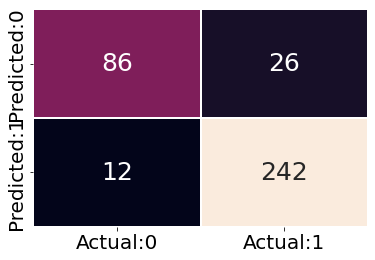

In [171]:
from matplotlib.colors import ListedColormap

# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(Y_test_enn, y_pred_enn)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns =['Actual:0','Actual:1'], index = ['Predicted:0','Predicted:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

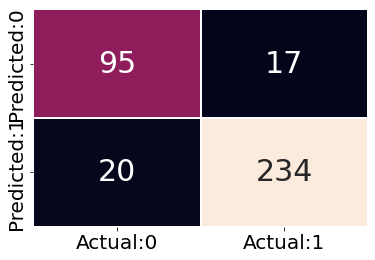

In [170]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(Y_test_enn, y_pred_class)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Actual:0','Actual:1'], index = ['Predicted:0','Predicted:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':30})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

# Hyper Parameter Tuning for Decision Tree using GridSearchCV

#### Create a generalized function to calculate the metrics for the train and the test set.

In [142]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train_enn)

    # return the performace measures on train set
    return(classification_report(Y_train_enn, train_pred))

In [143]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test_enn)

    # return the performace measures on test set
    return(classification_report(Y_test_enn, test_pred))

#### Build a full decision tree model on a train dataset using 'entropy'.

In [144]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train_enn, Y_train_enn)

**Calculate performance measures on the train set and test set.**

In [177]:
# compute the performance measures on train data
# call the function 'get_train_report'
# pass the decision tree to the function
train_report = get_train_report(decision_tree)

# print the performance measures
print(train_report)

print("------------------------------------------------------")

# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree to the function
test_report = get_test_report(decision_tree)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       608

    accuracy                           1.00       851
   macro avg       1.00      1.00      1.00       851
weighted avg       1.00      1.00      1.00       851

------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.65      0.71       112
           1       0.86      0.91      0.88       254

    accuracy                           0.83       366
   macro avg       0.81      0.78      0.79       366
weighted avg       0.83      0.83      0.83       366



**Interpretation:** From the above output, we can see that there is a difference between the train and test accuracy; thus, we can conclude that the decision tree is over-fitted on the train data.

If we tune the hyperparameters in the decision tree, it helps to avoid the over-fitting of the tree.

## Tune the Hyperparameters using GridSearchCV (Decision Tree)

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train_enn, Y_train_enn)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'max_leaf_nodes': 9, 'min_samples_leaf': 9, 'min_samples_split': 2} 



#### Build the model using the tuned hyperparameters.

In [148]:
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(X_train_enn, Y_train_enn)

**Calculate performance measures on the train set and test set.**

In [149]:
print('Classification Report of decision tree for train set: \n', get_train_report(dt_model))
print("------------------------------------------------------")
print('\nClassification Report of decision tree for test set: \n', get_test_report(dt_model))

Classification Report of decision tree for train set: 
               precision    recall  f1-score   support

           0       0.75      0.53      0.62       243
           1       0.83      0.93      0.88       608

    accuracy                           0.81       851
   macro avg       0.79      0.73      0.75       851
weighted avg       0.81      0.81      0.80       851

------------------------------------------------------

Classification Report of decision tree for test set: 
               precision    recall  f1-score   support

           0       0.71      0.46      0.55       112
           1       0.79      0.92      0.85       254

    accuracy                           0.78       366
   macro avg       0.75      0.69      0.70       366
weighted avg       0.77      0.78      0.76       366



**Interpretation:** From the above output, we can see that there is no significant difference between the train and test accuracy; thus, we can conclude that the decision tree after tuning the hyperparameters avoids the over-fitting of the data.

## Tune the Hyperparameters using GridSearchCV (Random Forest)

In [150]:
tuned_paramaters_rfc = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30],
                     'max_depth': range(2, 10),
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': range(2,5),
                     'min_samples_leaf': range(1,5),
                     'max_leaf_nodes': range(1, 5)}]

rfc = RandomForestClassifier(random_state = 10)

rfc_grid = GridSearchCV(estimator = rfc, 
                         param_grid = tuned_paramaters_rfc, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
rfc_grid_model = rfc_grid.fit(X_train_enn, Y_train_enn)

# get the best parameters
print('Best parameters for decision tree classifier: ', rfc_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'max_leaf_nodes': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 10} 



In [151]:
y_pred_rfc_test = dt_model.predict(X_test_enn)
y_pred_rfc_train = dt_model.predict(X_train_enn)

In [152]:
print("\nClassification report for training set of decision tree model:\n\n",classification_report(Y_train_enn, y_pred_rfc_train))
print("\nClassification report for test data set of decision tree model:\n\n",classification_report(Y_test_enn, y_pred_rfc_test))


Classification report for training set of decision tree model:

               precision    recall  f1-score   support

           0       0.75      0.53      0.62       243
           1       0.83      0.93      0.88       608

    accuracy                           0.81       851
   macro avg       0.79      0.73      0.75       851
weighted avg       0.81      0.81      0.80       851


Classification report for test data set of decision tree model:

               precision    recall  f1-score   support

           0       0.71      0.46      0.55       112
           1       0.79      0.92      0.85       254

    accuracy                           0.78       366
   macro avg       0.75      0.69      0.70       366
weighted avg       0.77      0.78      0.76       366

